In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt


In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/MLEXAM1/final_edm_dataset.csv')
#df2 = pd.read_csv('/content/drive/MyDrive/MLEXAM1/final_pop_dataset.csv')
df3 = pd.read_csv('/content/drive/MyDrive/MLEXAM1/final_rock_dataset.csv')
df4 = pd.read_csv('/content/drive/MyDrive/MLEXAM1/final_rap_dataset.csv')
df5 = pd.read_csv('/content/drive/MyDrive/MLEXAM1/final_country_dataset.csv')

In [3]:
df1['genre'] = 'edm'
#df2['genre'] = 'pop'
df3['genre'] = 'rock'
df4['genre'] = 'rap'
df5['genre'] = 'country'
#df = pd.concat([df1,df2,df3,df4,df5])
df = pd.concat([df1,df3,df4,df5])

In [4]:
df

,id,name,artists,artistid,explicit,popularity,durationms,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,2SHnUyZq0zwmvRIl4WY77G,Alive,['Krewella'],0Cd6nHYwecCNM1sVEXKlYr,False,52,290760,0.663,0.00413,0.822,0.003180,0.2340,-2.909,0.0557,128.002,0.567,edm
1,6h5PAsRni4IRlxWr6uDPTP,More Than You Know,['Axwell /\\ Ingrosso'],2XnBwblw31dfGnspMIwgWz,False,77,203000,0.646,0.02750,0.741,0.000000,0.3120,-4.973,0.0340,123.077,0.571,edm
2,0ct6r3EGTcMLPtrXHDvVjc,The Nights,['Avicii'],1vCWHaC5f2uS3yhpwWbIA6,False,83,176658,0.527,0.01660,0.835,0.000000,0.2490,-5.298,0.0433,125.983,0.654,edm
3,4ywUcVneBL8TNHIq6oJBz2,Calling (Lose My Mind) - Radio Edit,"['Sebastian Ingrosso', 'Alesso', 'Ryan Tedder']",6hyMWrxGBsOx6sWcVj1DqP,False,0,205440,0.416,0.00849,0.850,0.000175,0.2040,-4.910,0.0455,125.096,0.142,edm
4,46lFttIf5hnUZMGvjK0Wxo,Runaway (U & I),['Galantis'],4sTQVOfp9vEMCemLw50sbu,False,73,227073,0.506,0.00711,0.805,0.001930,0.0856,-4.119,0.0469,126.008,0.383,edm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7s2NbKcFIJuEQumhvtHTAD,You've Got to Stand for Something,['Aaron Tippin'],4XwKU420OWVk38vz1KvH3M,False,57,182280,0.533,0.19900,0.585,0.000000,0.1100,-9.789,0.0337,83.403,0.472,country
96,6o7BCdJjGvHBBPMb4ZrA68,Country Club,['Travis Tritt'],2M4Yt7oKGoYd0wqU44k4i2,False,54,190800,0.805,0.19400,0.570,0.000015,0.1060,-8.215,0.0272,126.478,0.760,country
97,26bL4gSULWDgdIMX0pRFrG,Redneck Woman,['Gretchen Wilson'],0IdYRFTswLdsGwSnzOaGNF,False,62,221333,0.499,0.13000,0.825,0.000000,0.3060,-5.146,0.1770,185.069,0.753,country
98,23hDnIFoFlVTDA6y8YrJoR,Colder Weather,['Zac Brown Band'],6yJCxee7QumYr820xdIsjo,False,1,273893,0.667,0.45500,0.381,0.000000,0.1160,-7.494,0.0294,135.975,0.199,country


In [5]:
df2 = df[['popularity','durationms','danceability', 'acousticness','energy', 'liveness', 'loudness', 'speechiness','tempo', 'valence','genre']]

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df2, test_size=0.2)

In [ ]:
y_train = train['genre']
y_test = test['genre']
X_train = train.drop('genre',axis=1)
X_test = test.drop('genre',axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
clf  = SVC(gamma='auto')
clf.fit(X_train,y_train)

SVC(gamma='auto')


The confusion matrix is:


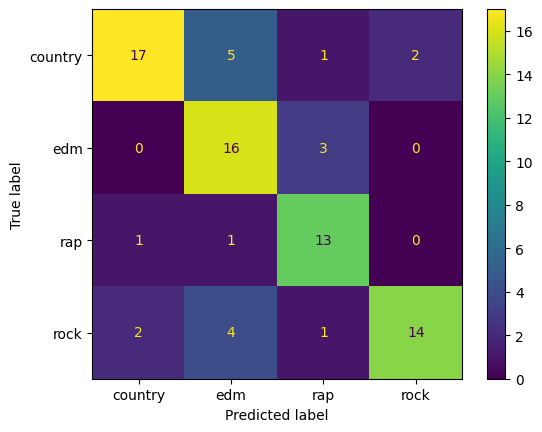

              precision    recall  f1-score   support

     country       0.85      0.68      0.76        25
         edm       0.62      0.84      0.71        19
         rap       0.72      0.87      0.79        15
        rock       0.88      0.67      0.76        21

    accuracy                           0.75        80
   macro avg       0.77      0.76      0.75        80
weighted avg       0.78      0.75      0.75        80



In [ ]:
clf  = SVC(gamma='auto',kernel='poly',C=10)
clf.fit(X_train,y_train)
Prediction = clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, Prediction)
print("\nThe confusion matrix is:")
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,display_labels=clf.classes_)  
disp.plot()
plt.savefig('confusionmatrixpoly.jpg')
plt.show()
print(classification_report(y_test,Prediction))

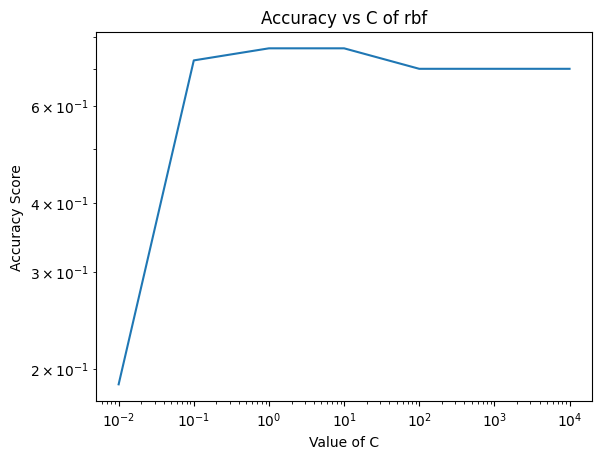

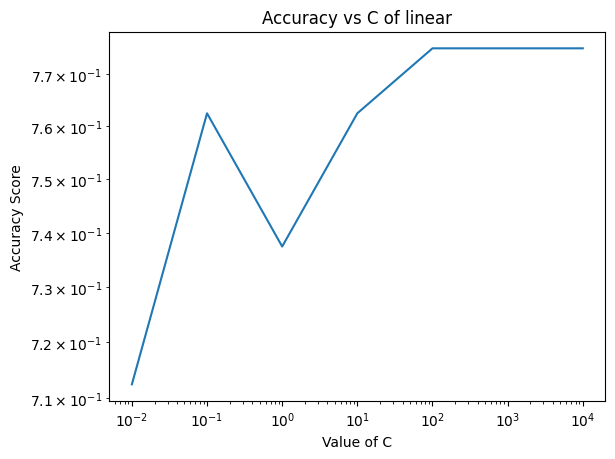

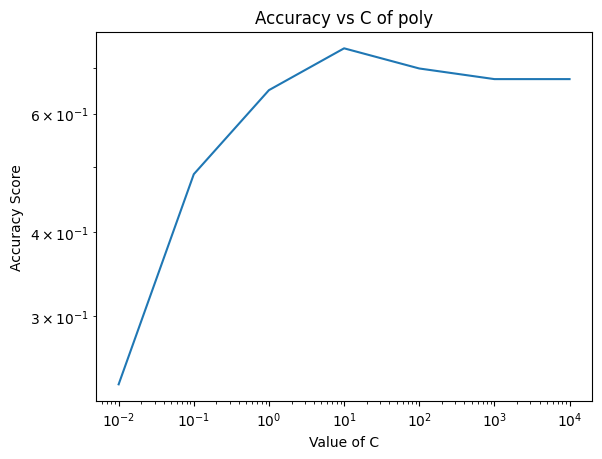

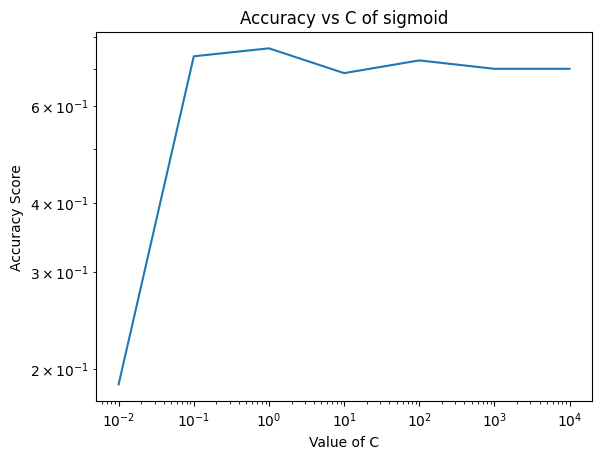

In [ ]:
C = [0.01,0.1,1,10,100,1000,10000]
kernel_names = ['rbf','linear','poly','sigmoid']
for k in kernel_names:
  scores = []
  for c in C:
    clf = SVC(C=c, kernel=k,gamma='auto')
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
  plt.loglog(C,scores)
  plt.title('Accuracy vs C of ' + k)
  plt.xlabel('Value of C')
  plt.ylabel('Accuracy Score')
  plt.savefig(f'Accuracy vs C of {k}.jpg')
  plt.show()

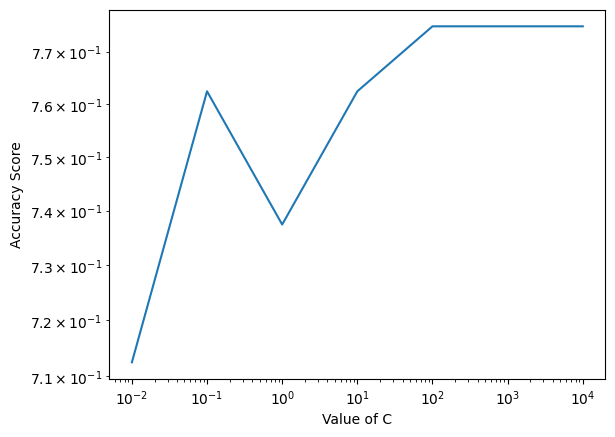

In [ ]:
C = [0.01,0.1,1,10,100,1000,10000]
scores = []
for c in C:
  clf = SVC(C=c, kernel='linear',gamma='auto')
  clf.fit(X_train,y_train)
  scores.append(clf.score(X_test,y_test))
plt.loglog(C,scores)
plt.xlabel('Value of C')
plt.ylabel('Accuracy Score')
plt.show()

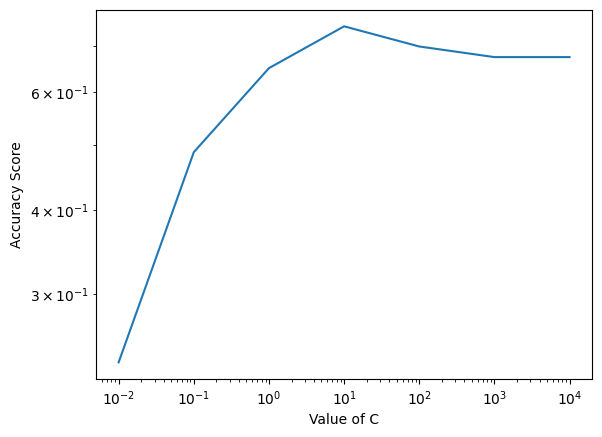

In [ ]:
C = [0.01,0.1,1,10,100,1000,10000]
scores = []
for c in C:
  clf = SVC(C=c, kernel='poly',gamma='auto')
  clf.fit(X_train,y_train)
  scores.append(clf.score(X_test,y_test))
plt.loglog(C,scores)
plt.xlabel('Value of C')
plt.ylabel('Accuracy Score')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.01,0.1,1,10,100,1000,10000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6]}
grid = GridSearchCV(SVC(gamma='auto'), param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(gamma='auto'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [ ]:
print(grid.best_params_)
print(grid.score(X_test,y_test))

{'C': 1, 'degree': 1, 'kernel': 'rbf'}
0.7625


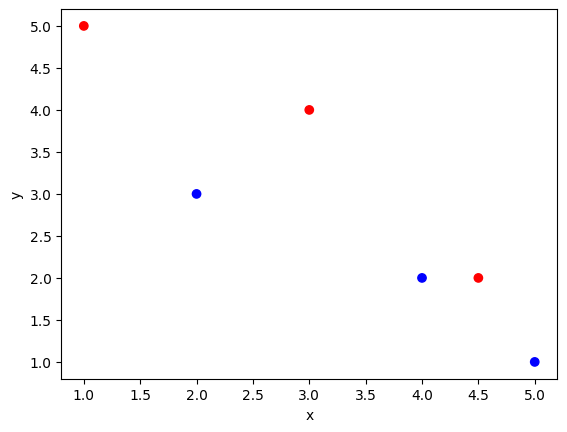

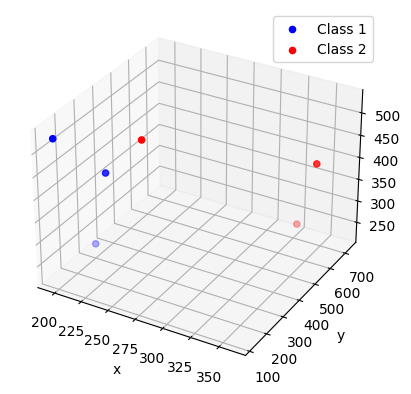

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define set of 2D data points with class labels
data_points_2d = np.array([[2, 3, 1], [1, 5, -1], [4, 2, 1], [3, 4, -1], [5, 1, 1],[4.5,2,-1]])

# Define polynomial kernel parameters
r = 1
d = 2

# Cast data points into higher-dimensional space using polynomial kernel
data_points_higher_dim = np.power(np.dot(data_points_2d[:, :-1], data_points_2d[:, :-1].T) + r, d)

# Create a 2D scatter plot to visualize the initial 2D data points
fig2d = plt.figure()
ax2d = fig2d.add_subplot(111)
ax2d.scatter(data_points_2d[:, 0], data_points_2d[:, 1], c=['blue', 'red', 'blue', 'red', 'blue','red'])
ax2d.set_xlabel('x')
ax2d.set_ylabel('y')

# Create a 3D plot to visualize the data points in the higher-dimensional space
fig3d = plt.figure()
ax3d = fig3d.add_subplot(111, projection='3d')

# Separate the data points into two classes
class_1 = data_points_higher_dim[data_points_2d[:, -1] == 1]
class_2 = data_points_higher_dim[data_points_2d[:, -1] == -1]

# Plot the two classes of data points in the higher-dimensional space
ax3d.scatter(class_1[:, 0], class_1[:, 1], class_1[:, 2], c='blue', label='Class 1')
ax3d.scatter(class_2[:, 0], class_2[:, 1], class_2[:, 2], c='red', label='Class 2')

ax3d.set_xlabel('x')
ax3d.set_ylabel('y')
ax3d.set_zlabel('z')
ax3d.legend()

plt.show()

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

# Define set of 2D data points with class labels
data_points_2d = np.array([[2, 3, 1], [1, 5, -1], [4, 2, 1], [3, 4, -1], [5, 1, 1],[4.5,2,-1]])

# Define polynomial kernel parameters
r = 1
d = 2

# Cast data points into higher-dimensional space using polynomial kernel
data_points_higher_dim = np.power(np.dot(data_points_2d[:, :-1], data_points_2d[:, :-1].T) + r, d)

# Separate the data points into two classes
class_1 = data_points_higher_dim[data_points_2d[:, -1] == 1]
class_2 = data_points_higher_dim[data_points_2d[:, -1] == -1]

# Define a function to create the 3D scatter plot
def plot_3d(elev, azim):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(class_1[:, 0], class_1[:, 1], class_1[:, 2], c='blue', label='Class 1')
    ax.scatter(class_2[:, 0], class_2[:, 1], class_2[:, 2], c='red', label='Class 2')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(elev=elev, azim=azim)
    plt.legend()
    plt.show()

# Create an interactive widget to adjust the view angle of the 3D scatter plot
interact(plot_3d, elev=(0, 90, 5), azim=(0, 360, 5))



interactive(children=(IntSlider(value=45, description='elev', max=90, step=5), IntSlider(value=180, descriptio…

<function __main__.plot_3d(elev, azim)>